# PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
data = load_iris()
X = data.data
y = data.target

# 2. Aplicar o PCA para reduzir a dimensionalidade para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [3]:
print(f"Variância explicada pelo 1º componente principal: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Variância explicada pelo 2º componente principal: {pca.explained_variance_ratio_[1]:.2f}")
print(f"Variância explicada total pelos dois primeiros componentes: {sum(pca.explained_variance_ratio_):.2f}")

Variância explicada pelo 1º componente principal: 0.92
Variância explicada pelo 2º componente principal: 0.05
Variância explicada total pelos dois primeiros componentes: 0.98


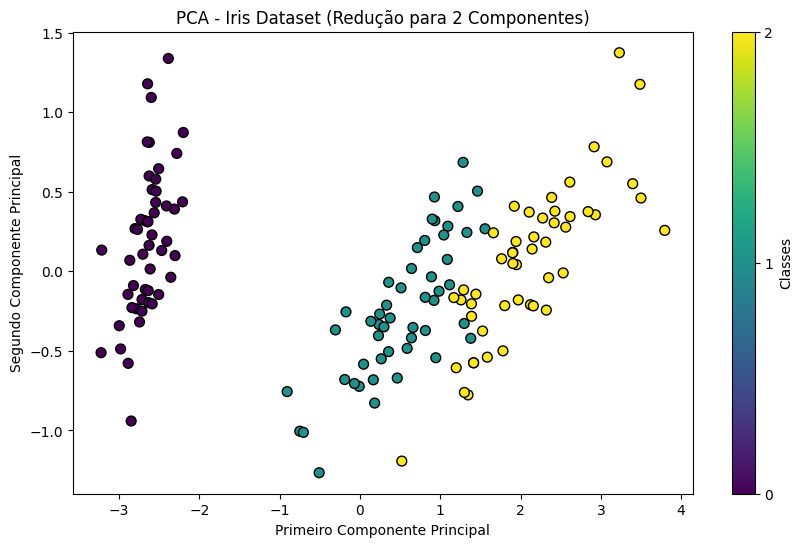

In [7]:
# 4. Visualizar os dados nos componentes principais
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)

# 5. Adicionar rótulos e títulos
plt.xlabel("Primeiro Componente Principal")
plt.ylabel("Segundo Componente Principal")
plt.title("PCA - Iris Dataset (Redução para 2 Componentes)")
plt.colorbar(scatter, ticks=[0, 1, 2], label='Classes')

# 6. Exibir o gráfico
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [11]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [12]:
svm_pred = svm_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

print(f"Acurácia do SVM: {accuracy_score(y_test, svm_pred):.2f}")
print(f"Acurácia do Gradient Boosting: {accuracy_score(y_test, gb_pred):.2f}")

Acurácia do SVM: 0.98
Acurácia do Gradient Boosting: 0.93


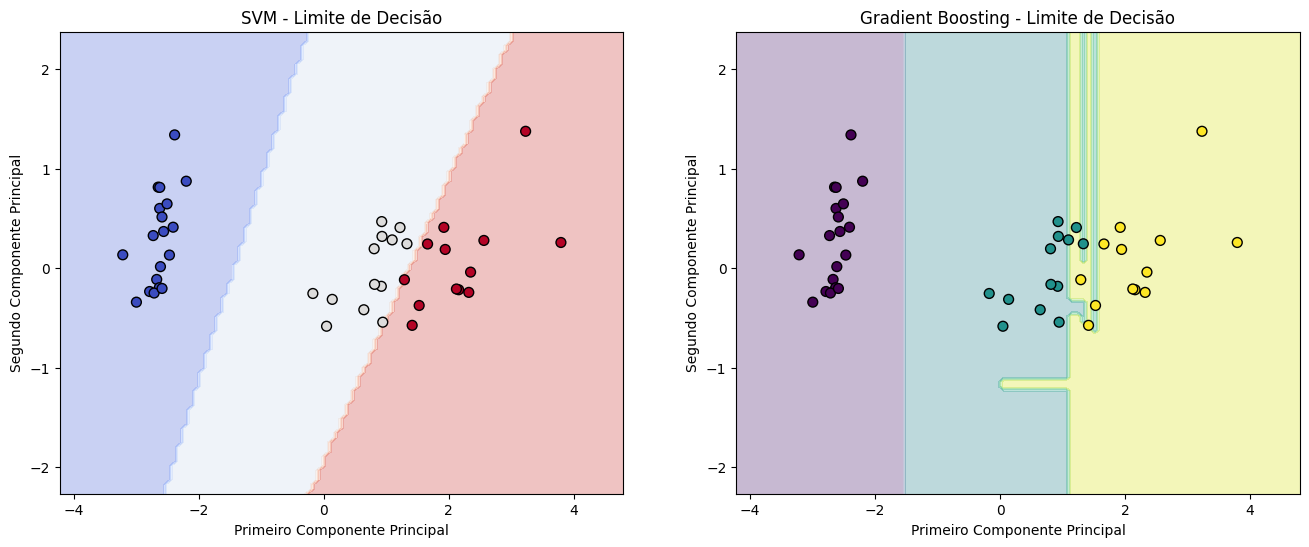

In [13]:
# 6. Visualizar os limites de decisão para cada modelo
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot para o SVM
DecisionBoundaryDisplay.from_estimator(svm_model, X_pca, cmap='coolwarm', alpha=0.3, ax=axes[0])
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', s=50)
axes[0].set_title("SVM - Limite de Decisão")
axes[0].set_xlabel("Primeiro Componente Principal")
axes[0].set_ylabel("Segundo Componente Principal")

# Plot para o Gradient Boosting
DecisionBoundaryDisplay.from_estimator(gb_model, X_pca, cmap='viridis', alpha=0.3, ax=axes[1])
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
axes[1].set_title("Gradient Boosting - Limite de Decisão")
axes[1].set_xlabel("Primeiro Componente Principal")
axes[1].set_ylabel("Segundo Componente Principal")

plt.show()